# IMPORTS


In [484]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pylab as plt
from mplsoccer import VerticalPitch
import matplotlib.font_manager as font_manager
pd.set_option('display.max_columns', 200)

# DATA SCRAPING


#### CHANGE PLAYER ID FROM UNDERSTAT


In [485]:
playerID = '647'

In [486]:
URL = f"https://understat.com/player/{playerID}"

In [487]:
response = requests.get(URL)
soup = BeautifulSoup(response.content, 'lxml')
scripts = soup.find_all('script')

In [488]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var groupsData 		= JSON.parse('\x7B\x22season\x22\x3A\x5B\x7B\x22position\x22\x3A\x22FW\x22,\x22games\x22\x3A\x222\x22,\x22goals\x22\x3A\x221\x22,\x22shots\x22\x3A\x225\x22,\x22time\x22\x3A\x22180\x22,\x22xG\x22\x3A\x221.0460323244333267\x22,\x22assists\x22\x3A\x221\x22,\x22xA\x22\x3A\x220.4286001846194267\x22,\x22key_passes\x22\x3A\x223\x22,\x22season\x22\x3A\x222024\x22,\x22team\x22\x3A\x22Bayern\x20Munich\x22,\x22yellow\x22\x3A\x221\x22,\x22red\x22\x3A\x220\x22,\x22npg\x22\x3A\x220\x22,\x22npxG\x22\x3A\x220.28825563192367554\x22,\x22xGChain\x22\x3A\x221.6447330713272095\x22,\x22xGBuildup\x22\x3A\x220.9770763218402863\x22\x7D,\x7B\x22position\x22\x3A\x22FW\x22,\x22games\x22\x3A\x2232\x22,\x22goals\x22\x3A\x2236\x22,\x22shots\x22\x3A\x22146\x22,\x22time\x22\x3A\x222854\x22,\x22xG\x22\x3A\x2233.116344682872295\x22,\x22assists\x22\x3A

In [489]:
#Retrieve Shots Data
shotsDataString = scripts[3].string

In [490]:
shotsDataString

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2214642\\x22,\\x22minute\\x22\\x3A\\x2283\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.795\\x22,\\x22Y\\x22\\x3A\\x220.32099998474121094\\x22,\\x22xG\\x22\\x3A\\x220.04750959947705269\\x22,\\x22player\\x22\\x3A\\x22Harry\\x20Kane\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x22647\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x224754\\x22,\\x22h_team\\x22\\x3A\\x22West\\x20Ham\\x22,\\x22a_team\\x22\\x3A\\x22Tottenham\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222014\\x2D08\\x2D16\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Andros\\x20Townsend\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2215400\\x22,\\x22minute\\x22\\x3A\\x2281\\x22,\\x22result\\x22\\x3A\\x22OwnGoal\\x22,\\x22X\\

In [491]:
#Clean data and json conversion
indexStart = shotsDataString.index("('")+2
indexEnd = shotsDataString.index("')")
jsonData = shotsDataString[indexStart:indexEnd]
jsonData = jsonData.encode('utf8').decode('unicode_escape')

data = json.loads(jsonData)

In [492]:
data

[{'id': '14642',
  'minute': '83',
  'result': 'BlockedShot',
  'X': '0.795',
  'Y': '0.32099998474121094',
  'xG': '0.04750959947705269',
  'player': 'Harry Kane',
  'h_a': 'a',
  'player_id': '647',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '4754',
  'h_team': 'West Ham',
  'a_team': 'Tottenham',
  'h_goals': '0',
  'a_goals': '1',
  'date': '2014-08-16 15:00:00',
  'player_assisted': 'Andros Townsend',
  'lastAction': 'Pass'},
 {'id': '15400',
  'minute': '81',
  'result': 'OwnGoal',
  'X': '0.029000000953674318',
  'Y': '0.5820000076293945',
  'xG': '0',
  'player': 'Harry Kane',
  'h_a': 'a',
  'player_id': '647',
  'situation': 'SetPiece',
  'season': '2014',
  'shotType': 'OtherBodyPart',
  'match_id': '4724',
  'h_team': 'Sunderland',
  'a_team': 'Tottenham',
  'h_goals': '2',
  'a_goals': '2',
  'date': '2014-09-13 15:00:00',
  'player_assisted': None,
  'lastAction': 'Foul'},
 {'id': '16333',
  'minute': '68',
  'result': 'SavedSh

In [493]:
df = pd.json_normalize(data)

In [494]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,14642,83,BlockedShot,0.795,0.32099998474121094,0.04750959947705269,Harry Kane,a,647,OpenPlay,2014,RightFoot,4754,West Ham,Tottenham,0,1,2014-08-16 15:00:00,Andros Townsend,Pass
1,15400,81,OwnGoal,0.029000000953674318,0.5820000076293945,0,Harry Kane,a,647,SetPiece,2014,OtherBodyPart,4724,Sunderland,Tottenham,2,2,2014-09-13 15:00:00,None,Foul
2,16333,68,SavedShot,0.9059999847412109,0.46900001525878904,0.4358299970626831,Harry Kane,h,647,OpenPlay,2014,LeftFoot,4715,Tottenham,Newcastle United,1,2,2014-10-26 13:30:00,Danny Rose,Pass
3,16901,58,SavedShot,0.9169999694824219,0.46299999237060546,0.08578819781541824,Harry Kane,a,647,FromCorner,2014,Head,4657,Aston Villa,Tottenham,1,2,2014-11-02 16:00:00,Erik Lamela,Cross
4,16909,89,Goal,0.7609999847412109,0.415,0.0676921010017395,Harry Kane,a,647,DirectFreekick,2014,RightFoot,4657,Aston Villa,Tottenham,1,2,2014-11-02 16:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,586689,10,SavedShot,0.9230000305175782,0.3390000152587891,0.07864826172590256,Harry Kane,a,647,OpenPlay,2024,RightFoot,27749,Wolfsburg,Bayern Munich,2,3,2024-08-25 13:30:00,Michael Olise,Pass
1301,586707,79,BlockedShot,0.915,0.5179999923706055,0.10775043815374374,Harry Kane,a,647,OpenPlay,2024,RightFoot,27749,Wolfsburg,Bayern Munich,2,3,2024-08-25 13:30:00,Kingsley Coman,Cross
1302,590031,34,BlockedShot,0.924000015258789,0.5670000076293945,0.0526578351855278,Harry Kane,h,647,OpenPlay,2024,Head,27759,Bayern Munich,Freiburg,2,0,2024-09-01 15:30:00,Michael Olise,Aerial
1303,590032,37,Goal,0.885,0.5,0.75777667760849,Harry Kane,h,647,Penalty,2024,RightFoot,27759,Bayern Munich,Freiburg,2,0,2024-09-01 15:30:00,None,Standard


In [495]:
df.shape

(1305, 20)

# DATA CLEANUP + VARIABLE ASSIGNMENT


In [496]:
playerName = df['player'].iloc[0]
season = df['season'].iloc[0]

In [497]:
playerName

'Harry Kane'

In [498]:
df['result'].unique()

array(['BlockedShot', 'OwnGoal', 'SavedShot', 'Goal', 'MissedShots',
       'ShotOnPost'], dtype=object)

In [499]:
df.drop(columns=['player', 'h_a', 'player_id', 'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team', 'a_goals', 'date', 'player_assisted', 'lastAction'], inplace=True)

In [500]:
df['xG'] = df['xG'].astype(float)
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

In [501]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [502]:
df

,id,minute,result,X,Y,xG,h_goals
0,14642,83,BlockedShot,79.500000,32.099998,0.047510,0
1,15400,81,OwnGoal,2.900000,58.200001,0.000000,2
2,16333,68,SavedShot,90.599998,46.900002,0.435830,1
3,16901,58,SavedShot,91.699997,46.299999,0.085788,1
4,16909,89,Goal,76.099998,41.500000,0.067692,1
...,...,...,...,...,...,...,...
1300,586689,10,SavedShot,92.300003,33.900002,0.078648,2
1301,586707,79,BlockedShot,91.500000,51.799999,0.107750,2
1302,590031,34,BlockedShot,92.400002,56.700001,0.052658,2
1303,590032,37,Goal,88.500000,50.000000,0.757777,2


In [503]:
totalShots = df.shape[0]
totalGoals = df[df['result'] == 'Goal'].shape[0]

In [504]:
totalXG = df['xG'].sum()
XGPerShot = totalXG/totalShots

#### ASSUMING THE FIELD IS 110 M


In [505]:
averageDistance = df['X'].mean()
xDistanceMeter = 110 - (averageDistance*1.10)

In [506]:
averageDistance

85.79892706286405

# GRAPHING


In [507]:
backgroundColor = '#1a1c1f'
fontPath = './Roboto-Regular.ttf'
fontProps = font_manager.FontProperties(fname = fontPath)

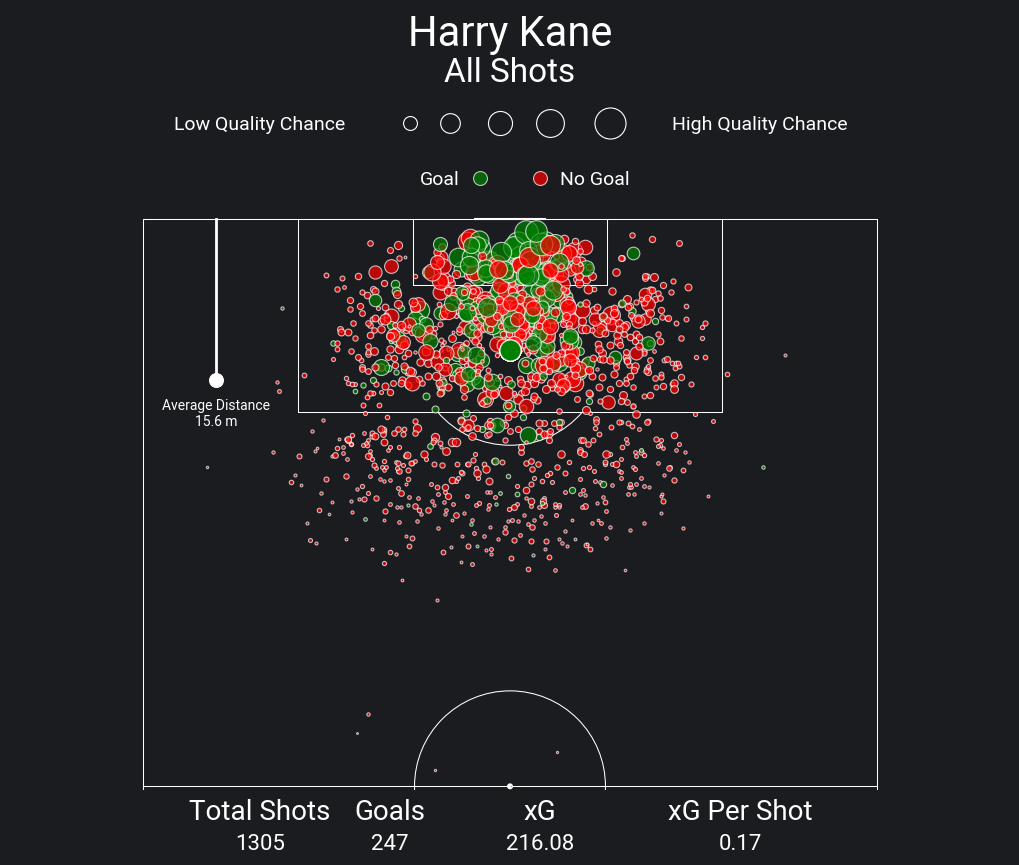

In [508]:
fig = plt.figure(figsize = (10,12))
fig.patch.set_facecolor(backgroundColor)

#CREATE 1ST BLOCK
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(backgroundColor)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#HEADERS
ax1.text(x=0.5, y=0.85, s=playerName, fontsize=30, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.text(x=0.5, y=0.70, s='All Shots', fontsize=24, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#QUALITY
ax1.text(x=0.25, y=0.50, s='Low Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.scatter(x=0.40, y=0.53, s=100, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.44, y=0.53, s=200, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.49, y=0.53, s=300, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.54, y=0.53, s=400, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.60, y=0.53, s=500, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.text(x=0.75, y=0.50, s='High Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#GOAL COLOR CODING
ax1.text(x=0.45, y=0.27, s='Goal', fontsize=14, fontproperties=fontProps, color='white', ha='right')
ax1.scatter(x=0.47, y=0.3, s=100, color='green', edgecolor='white', linewidth=0.8, alpha=0.7)
ax1.text(x=0.55, y=0.27, s='No Goal', fontsize=14, fontproperties=fontProps, color='white', ha='left')
ax1.scatter(x=0.53, y=0.3, s=100, color='red', edgecolor='white', linewidth=0.8, alpha=0.7)

#CREATE 2ND BLOCK
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
ax2.set_facecolor(backgroundColor)

#CREATE PITCH
pitch = VerticalPitch(pitch_type='opta', half=True, pitch_color=backgroundColor, pad_bottom=0.5, line_color='white', linewidth=0.75, axis=True, label=True)
pitch.draw(ax=ax2)

#Average Distance PLot
ax2.scatter(x=90, y=averageDistance, s=100, color='white', linewidth=0.8)
ax2.plot([90,90], [100,averageDistance], color='white', linewidth=2)
ax2.text(x=90, y=averageDistance-4, s=f'Average Distance\n{xDistanceMeter:.1f} m', fontsize=10, fontproperties=fontProps, color='white', ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(x['X'], x['Y'], s=300 * x['xG'], color='green' if x['result'] == 'Goal' else 'red', ax=ax2, alpha=0.7, linewidth=0.8, edgecolor='white')

#CREATE 3RD BLOCK
ax3 = fig.add_axes([0, 0.2, 1, 0.05])
ax3.set_facecolor(backgroundColor)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)

ax3.text(x=0.25, y=0.5, s='Total Shots', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.25, y=0, s=f'{totalShots}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.38, y=0.5, s='Goals', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.38, y=0, s=f'{totalGoals}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.53, y=0.5, s='xG', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.53, y=0, s=f'{totalXG:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.73, y=0.5, s='xG Per Shot', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.73, y=0, s=f'{XGPerShot:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# ADD FILTER BY YEAR


# ADD FILTER BY TEAM
